In [78]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [79]:
data = load_wine()
X = data.data
y = data.target

In [80]:
class_counts = pd.Series(y).value_counts()
print("Numero di campioni per ciascuna classe:")
print(class_counts)

Numero di campioni per ciascuna classe:
1    71
0    59
2    48
Name: count, dtype: int64


In [81]:
X_df = pd.DataFrame(X, columns=data.feature_names)
statistics = X_df.describe()

print(statistics)

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

C:\Users\loren\AppData\Local\Temp\ipykernel_14252\576172087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues_d")


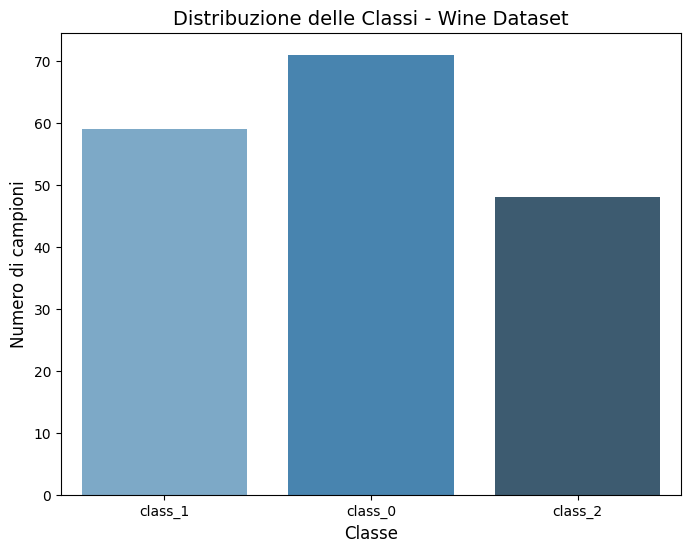

In [82]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues_d")
plt.title("Distribuzione delle Classi - Wine Dataset", fontsize=14)
plt.xlabel("Classe", fontsize=12)
plt.ylabel("Numero di campioni", fontsize=12)
plt.xticks(ticks=class_counts.index, labels=data.target_names, rotation=0)
plt.show()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)  

In [85]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [86]:
y_pred = model.predict(X_test_scaled)

In [87]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [88]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [89]:
feature_importances = model.feature_importances_
feature_importances

array([0.11239774, 0.03570276, 0.02128206, 0.03242488, 0.0368407 ,
       0.02927859, 0.20229342, 0.01351525, 0.02356092, 0.17120218,
       0.07089132, 0.11156432, 0.13904587])

In [90]:
features_df = pd.DataFrame({
    "Feature": data.feature_names,
    "Importance": feature_importances
})

In [91]:
features_df = features_df.sort_values(by="Importance", ascending=False)

C:\Users\loren\AppData\Local\Temp\ipykernel_14252\2167490254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette="viridis")


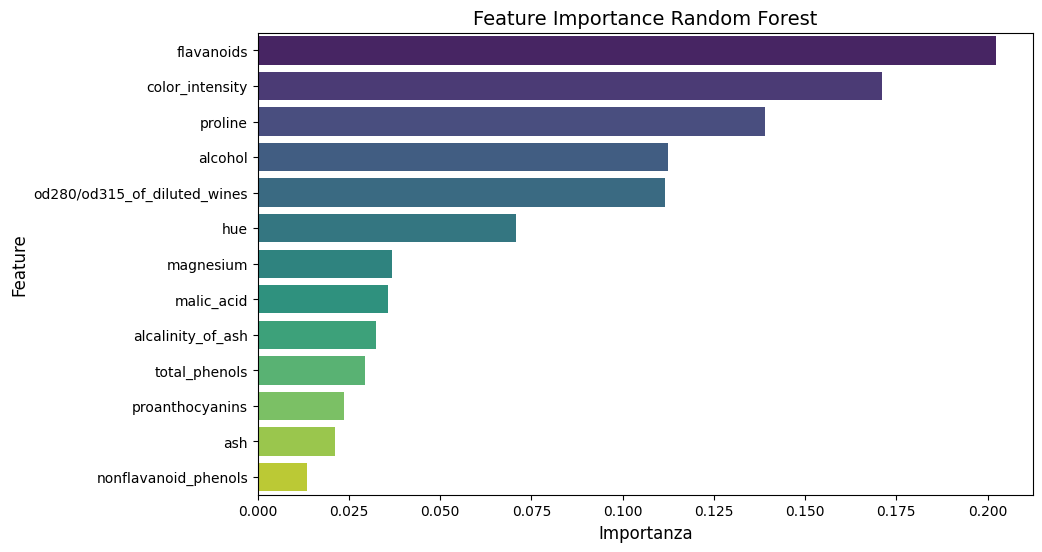

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette="viridis")
plt.title("Feature Importance Random Forest", fontsize=14)
plt.xlabel("Importanza", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

In [93]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


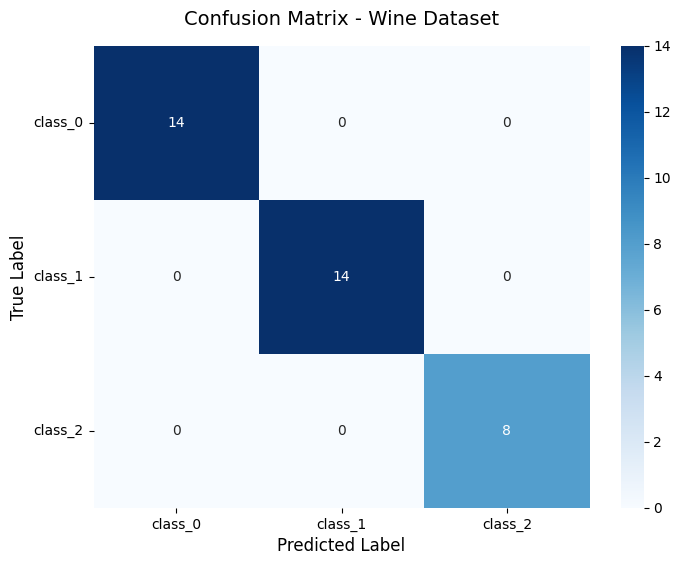

In [94]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', 
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix - Wine Dataset", fontsize=14, pad=15)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.show()


In [95]:
param_grid = {
    "n_estimators": [50, 100, 150, 200],  
    "max_depth": [None, 10, 20, 30]        
}

In [96]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)

In [103]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=150; total time=   0.0s
[CV] END ...................max_depth=None, n_es

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=2)

In [98]:
print(grid_search.best_params_)

{'max_depth': None, 'n_estimators': 100}


In [99]:
best_clf = grid_search.best_estimator_
y_pred_optimized = best_clf.predict(X_test)
print(y_pred_optimized)

[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]


In [100]:
#EXTRA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["Target"] = y
pca_df

,PC1,PC2,Target
0,318.562979,21.492131,0
1,303.097420,-5.364718,0
2,438.061133,-6.537309,0
3,733.240139,0.192729,0
4,-11.571428,18.489995,0
...,...,...,...
173,-6.980211,-4.541137,2
174,3.131605,2.335191,2
175,88.458074,18.776285,2
176,93.456242,18.670819,2


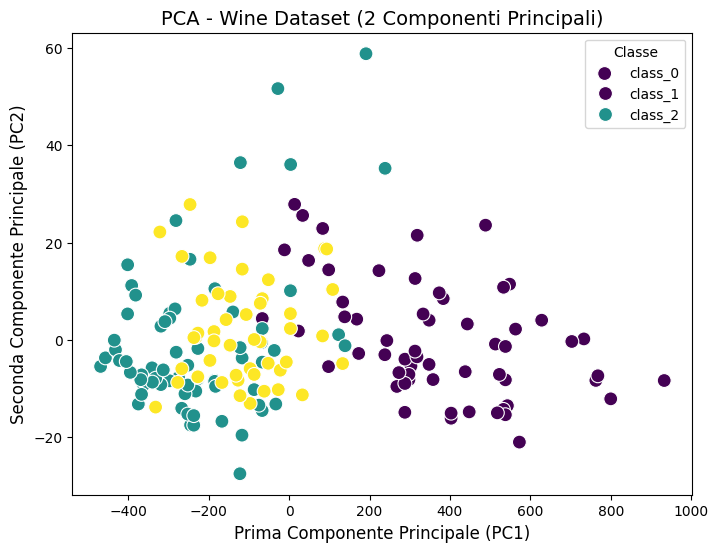

In [101]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Target", data=pca_df, palette="viridis", s=100, marker='o')
plt.title("PCA - Wine Dataset (2 Componenti Principali)", fontsize=14)
plt.xlabel("Prima Componente Principale (PC1)", fontsize=12)
plt.ylabel("Seconda Componente Principale (PC2)", fontsize=12)
plt.legend(title="Classe", labels=data.target_names)